# Analysing car mpg data set using Decision Tree Regressor

In [47]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 


In [48]:
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

# Import Linear Regression machine learning library
from sklearn.tree import DecisionTreeRegressor

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

In [49]:
# reading the CSV file into pandas dataframe
mpg_df = pd.read_csv("D:\\Ml_Data\car-mpg.csv")  

In [50]:
# Check top few records to get a feel of the data structure
mpg_df.head(50)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,0,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,0,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,0,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,0,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,0,amc ambassador dpl


In [51]:
mpg_df.describe().transpose()     # horsepower is missing

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0


In [52]:
temp = pd.DataFrame(mpg_df.hp.str.isdigit()) 
temp[temp['hp'] == False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [53]:
mpg_df = mpg_df.replace('?', np.nan)

In [54]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_type    398 non-null int64
car_name    398 non-null object
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


In [55]:
mpg_df['hp'] = mpg_df['hp'].astype('float64')

In [56]:
numeric_cols = mpg_df.drop('car_name', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
car_names = pd.DataFrame(mpg_df[['car_name']])


numeric_cols = numeric_cols.apply(lambda x: x.fillna(x.median()),axis=0)
mpg_df = numeric_cols.join(car_names)   # Recreating mpg_df by combining numerical columns with car names

mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_type    398 non-null int64
car_name    398 non-null object
dtypes: float64(4), int64(5), object(1)
memory usage: 31.2+ KB


##  Let us do a pair plot analysis to visually check study the data

C:\Users\Mukesh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Mukesh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Mukesh\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


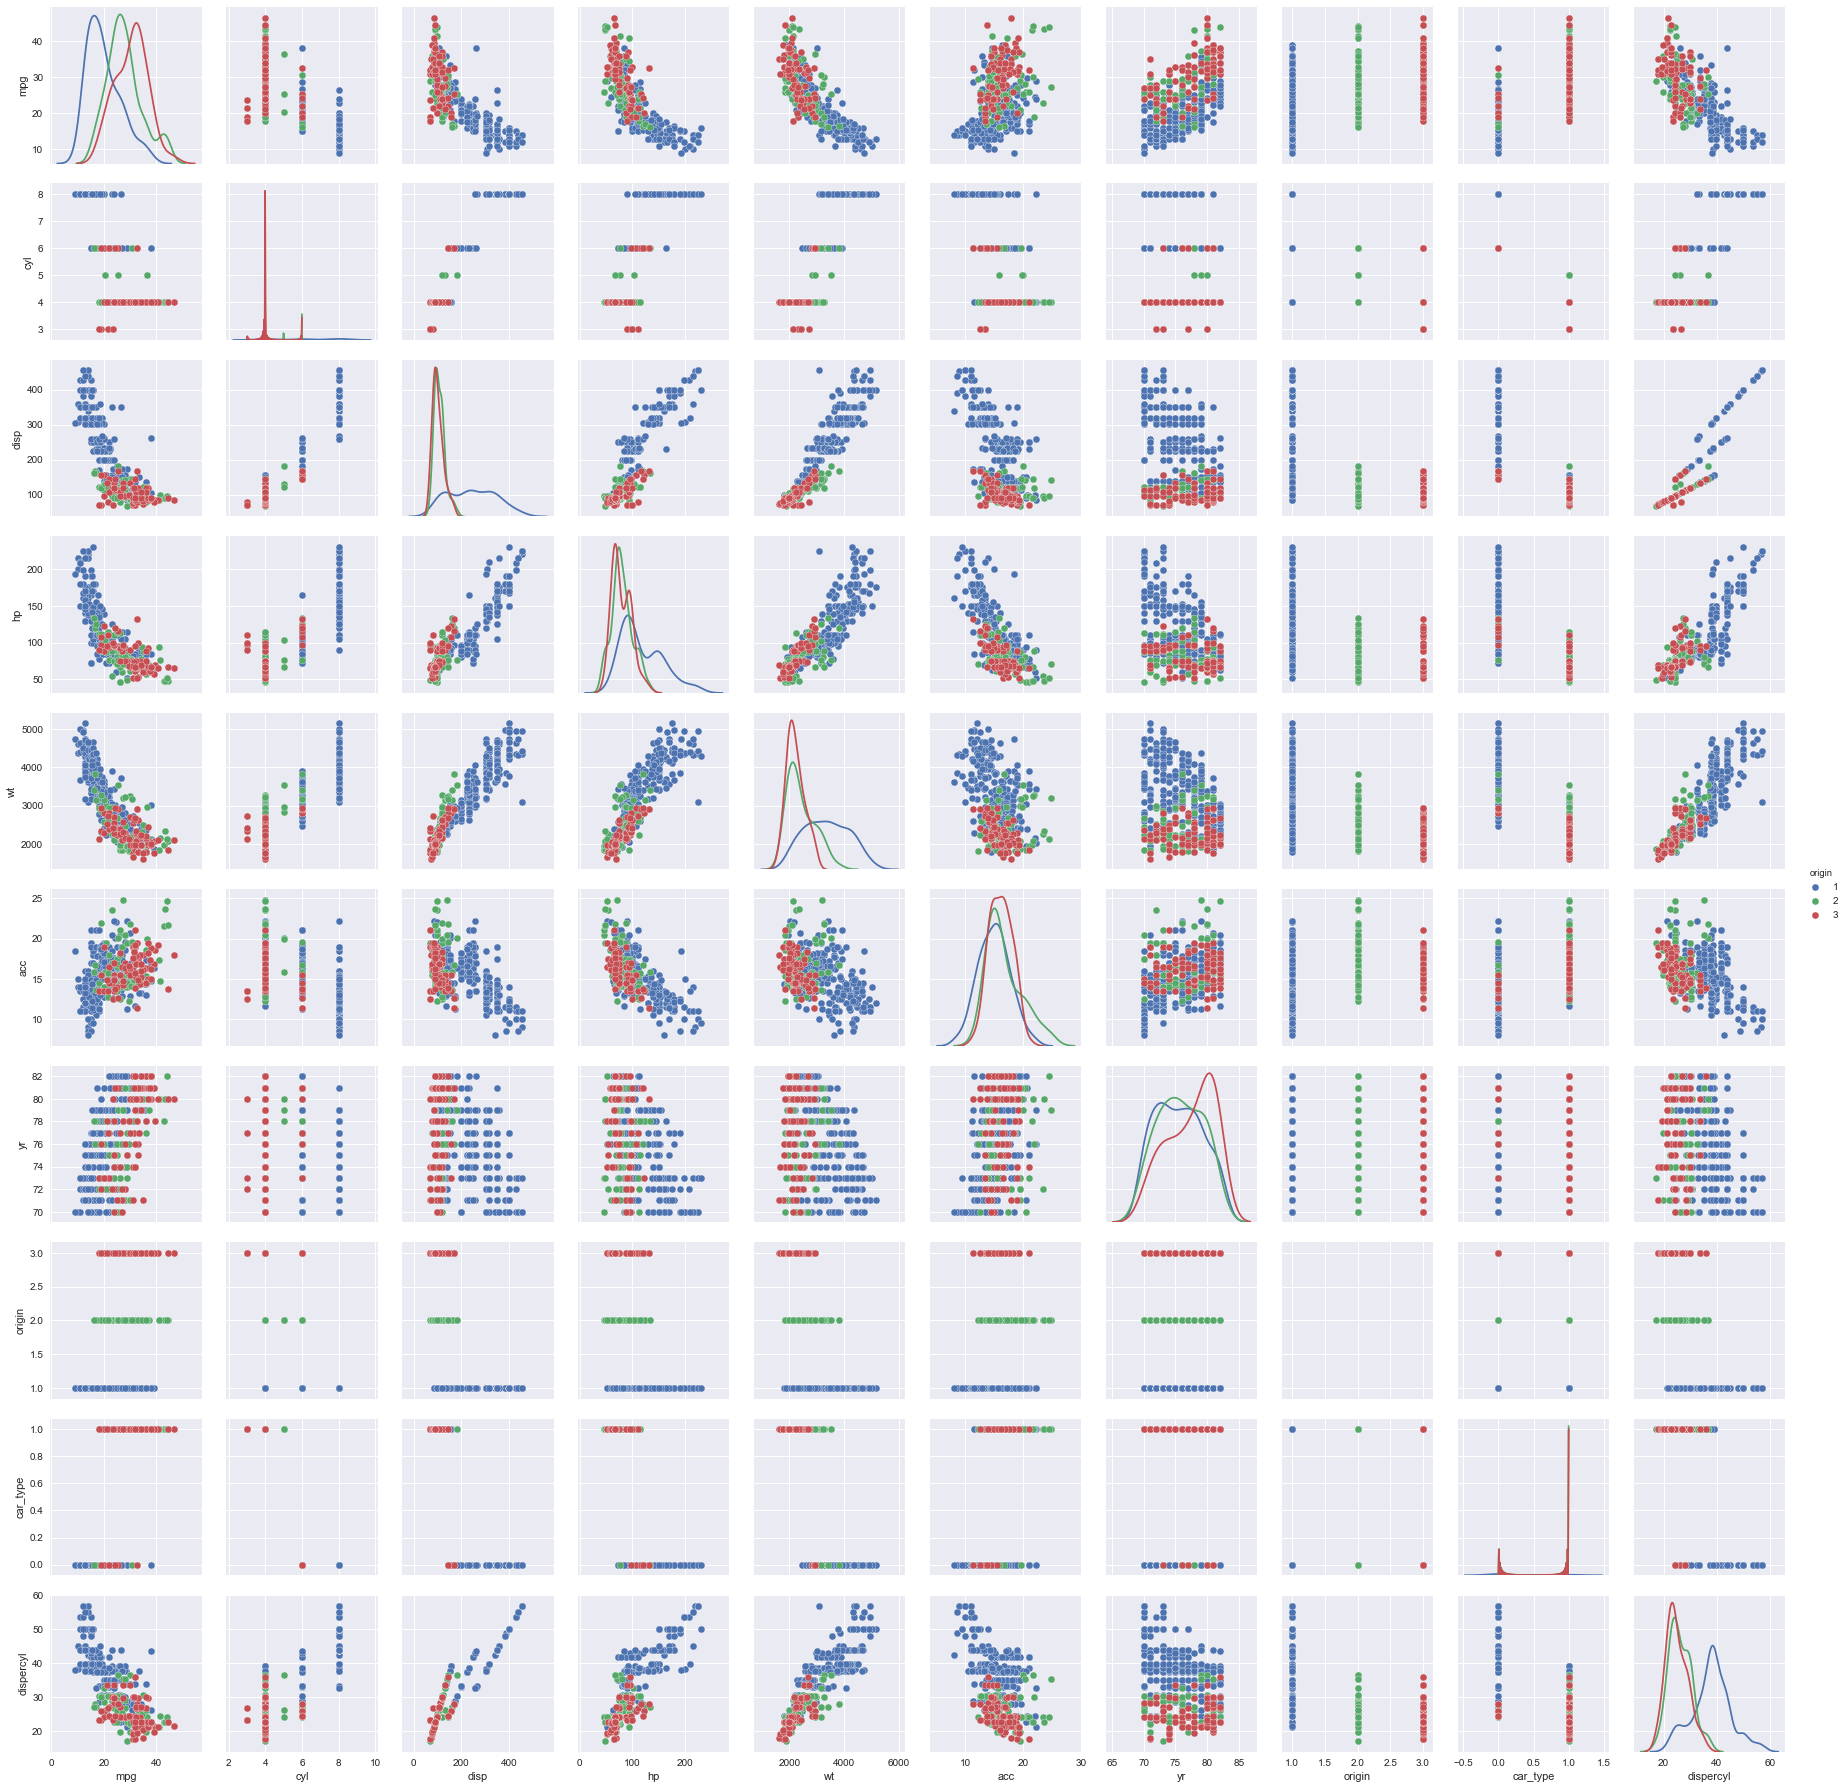

In [35]:
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
# The result can be stored as a .png file and opened in say, paint to get a larger view 

mpg_df_attr = mpg_df.iloc[:, 0:9]
mpg_df_attr['dispercyl'] = mpg_df_attr['disp'] / mpg_df_attr['cyl']
sns.pairplot(mpg_df_attr, diag_kind='kde', hue = 'origin')   # to plot density curve instead of histogram

#sns.pairplot(mpg_df_attr)  # to plot histogram, the default

# Step 5 DecisionTree Regression

In [57]:

from scipy.stats import zscore

mpg_df_attr_z = mpg_df_attr.apply(zscore)
print(mpg_df_attr_z.info())
mpg_df_attr_z.pop('origin')      # Remove "origin" and "yr" columns
mpg_df_attr_z.pop('yr')

array = mpg_df_attr_z.values
X = array[:,1:5] # select all rows and first 4 columns which are the attributes
y = array[:,0]   # select all rows and the 0th column which is the classification "Yes", "No" for diabeties
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
mpg          398 non-null float64
cyl          398 non-null float64
disp         398 non-null float64
hp           398 non-null float64
wt           398 non-null float64
acc          398 non-null float64
yr           398 non-null float64
origin       398 non-null float64
car_type     398 non-null float64
dispercyl    398 non-null float64
dtypes: float64(10)
memory usage: 31.2 KB
None


In [58]:
regressor = DecisionTreeRegressor(random_state=0, max_depth=3)

regressor.fit(X_train , y_train)
feature_importances = regressor.feature_importances_


feature_names = mpg_df_attr.columns[1:9]
print(feature_names)

k = 8

print(feature_importances)
top_k_idx = (feature_importances.argsort()[-k:][::-1])

print(feature_names[top_k_idx], feature_importances)

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'car_type'], dtype='object')
[0.74791504 0.01157464 0.19724952 0.04326079]
Index(['cyl', 'hp', 'wt', 'disp'], dtype='object') [0.74791504 0.01157464 0.19724952 0.04326079]


In [59]:
from IPython.display import Image  
from sklearn import tree
from os import system


mpg_Tree_File = open('d:\mpg_tree.dot','w')
dot_data = tree.export_graphviz(regressor, out_file=mpg_Tree_File, feature_names =(['cyl', 'hp', 'wt', 'disp']) )

mpg_Tree_File.close()

# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

system("dot -Tpng D:\mpg_tree.dot -o D:/mpg_tree.png")
#Image("d:\mpg_tree.png")

0

In [60]:
y_pred = regressor.predict(X_test)

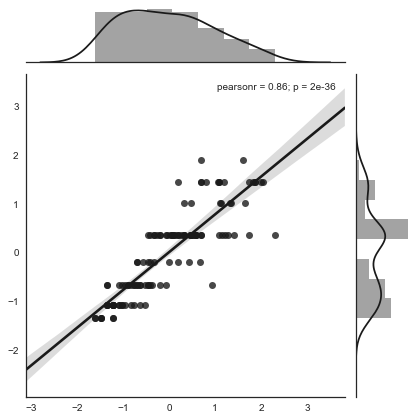

In [61]:
import seaborn as sns
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

            
#g = sns.jointplot("y_actuals", "y_predicted", data=tips, kind="reg",
#                  xlim=(0, 60), ylim=(0, 12), color="r", size=7)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");


##  ITERATION 2 





In [62]:
mpg_df_attr_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg          398 non-null float64
cyl          398 non-null float64
disp         398 non-null float64
hp           398 non-null float64
wt           398 non-null float64
acc          398 non-null float64
car_type     398 non-null float64
dispercyl    398 non-null float64
dtypes: float64(8)
memory usage: 25.0 KB


In [84]:
# 1. Drop acc column based on the above visual analysis

X = mpg_df_attr_z.drop( ['mpg','acc', 'car_type', 'dispercyl', 'wt' ] , axis=1)
y = mpg_df_attr_z['mpg']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [85]:
regressor.fit(X_train , y_train)
y_pred = regressor.predict(X_test)

regressor.feature_importances_

print (pd.DataFrame(regressor.feature_importances_, columns = ["Imp"], index = X_train.columns))

           Imp
cyl   0.761673
disp  0.018656
hp    0.219671


In [86]:
y_pred = regressor.predict(X_test)

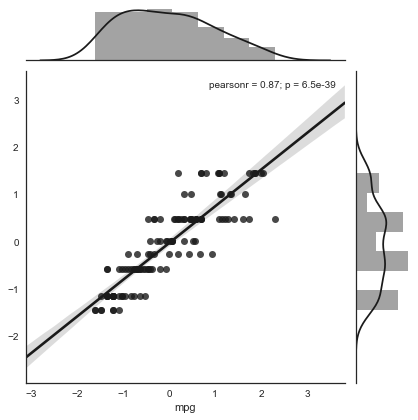

In [87]:
            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");